<a href="https://colab.research.google.com/github/redcoding72/Projet-Data-science/blob/main/credit_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
# Importer les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle

In [53]:
# Lire la base de données
df = pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [54]:
pd.set_option('display.max_rows', df.shape[0]+1)

In [55]:
#df

In [56]:
pd.set_option('display.max_rows',10)

In [57]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [58]:
# Voir les valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [59]:
df.isnull().sum().sort_values(ascending = False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
                     ..
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
Length: 13, dtype: int64

In [60]:
# Afficher les valeurs aberantes
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [61]:
# Afficher les variables catégoriques
df.describe(include = 'O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [62]:
 # Renseigner les valeurs manquantes
cat_data = []
num_data = []
for i,c in enumerate(df.dtypes):
  if c == object:
    cat_data.append(df.iloc[:,i])
  else :
    num_data.append(df.iloc[:,i])
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()


In [63]:
# Pour les valeurs catégoriques on va remplacer les valeurs manquantes par les valeurs qui se reptent le plus
cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any()

False

In [64]:
# Pour les valeurs numeriques on va remplacer les valeurs manquantes par la valeur précedantede la même colonne
num_data.fillna(method = 'bfill', inplace = True)
num_data.isnull().sum().any()

False

In [65]:
# transfomer la colonne target
target_value = {'Y':1,'N':0}
target = cat_data['Loan_Status']
cat_data.drop('Loan_Status', axis = 1, inplace = True)
target = target.map(target_value)
target

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [66]:
# Remplacer les valeurs catégoriques par des valeurs numérique 0,1,2....
le = LabelEncoder()
for i in cat_data:
  cat_data[i] = le.fit_transform(cat_data[i])
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0
610,610,1,1,3,0,0,0
611,611,1,1,1,0,0,2
612,612,1,1,2,0,0,2


In [67]:
# Supprimer la colonne loan_id
cat_data.drop('Loan_ID', axis = 1, inplace = True)

In [68]:
# Concatener cat_data et nul_data et spécifier la colonne target
X = pd.concat([cat_data,num_data], axis=1)
y = target

In [69]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [70]:
# On va commencer par la variable target
target.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [71]:
df = pd.concat([cat_data, num_data, target], axis=1)

Le pourcentage des crédits accordés est : 69 %
Le pourcentage des crédits non accordés est : 31 %


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


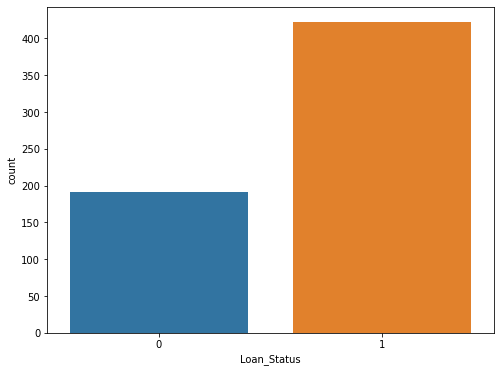

In [72]:
plt.figure(figsize=(8,6))
sns.countplot(target)
yes = round((target.value_counts()[1]/len(target))*100)
no = round((target.value_counts()[0]/len(target))*100)
print(f'Le pourcentage des crédits accordés est : {yes} %')
print(f'Le pourcentage des crédits non accordés est : {no} %')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


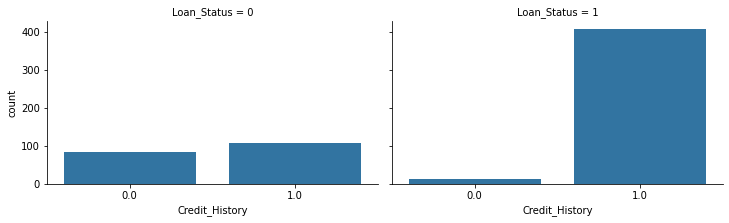

In [73]:
# Credit history
grid = sns.FacetGrid(df, col ='Loan_Status', size = 3.2, aspect = 1.6)
grid.map(sns.countplot, 'Credit_History')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


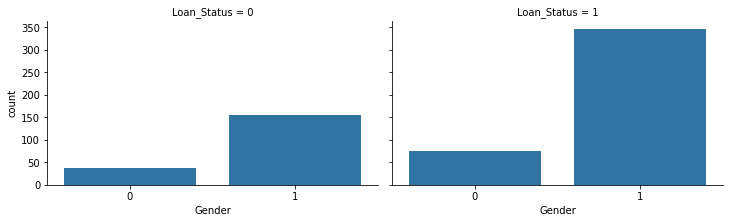

In [74]:
# Sexe
grid = sns.FacetGrid(df, col ='Loan_Status', size = 3.2, aspect = 1.6)
grid.map(sns.countplot, 'Gender')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


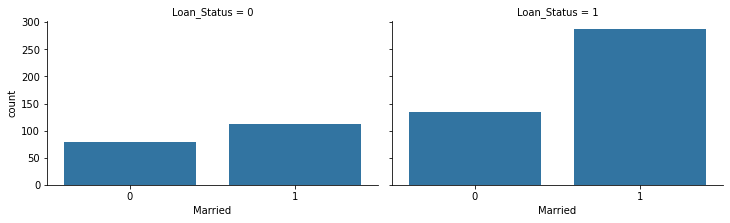

In [75]:
# Married
grid = sns.FacetGrid(df, col ='Loan_Status', size = 3.2, aspect = 1.6)
grid.map(sns.countplot, 'Married')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


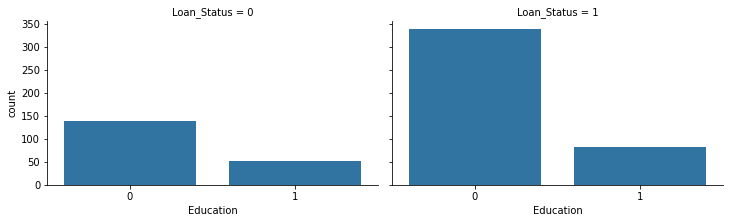

In [76]:
# Education
grid = sns.FacetGrid(df, col ='Loan_Status', size = 3.2, aspect = 1.6)
grid.map(sns.countplot, 'Education')

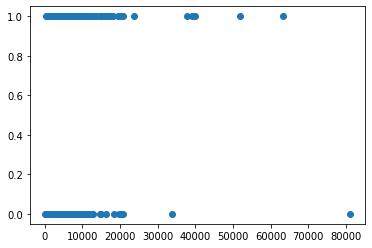

In [77]:
# Revenu du demandeur
plt.scatter(df['ApplicantIncome'],df['Loan_Status'])

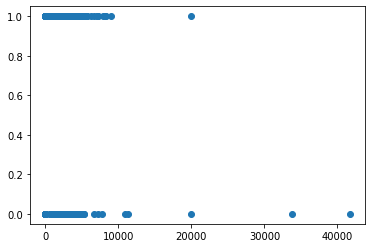

In [78]:
plt.scatter(df['CoapplicantIncome'],df['Loan_Status'])

In [79]:
df.groupby('Loan_Status').median()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,,,,,
0,1.0,1.0,0.0,0.0,0.0,1.0,3833.5,268.0,132.5,360.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,3812.5,1239.5,127.5,360.0,1.0


In [80]:
# Diviser la base de données en une base test et d'entrainement
sss = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state=42)
for train,test in sss.split(X,y):
  X_train,X_test = X.iloc[train],X.iloc[test]
  y_train,y_test = y.iloc[train],y.iloc[test]

print('X_train taille: ',X_train.shape)
print('X_test taille: ',X_test.shape)
print('y_train taille: ',y_train.shape)
print('y_test taille: ',y_test.shape)


X_train taille:  (491, 11)
X_test taille:  (123, 11)
y_train taille:  (491,)
y_test taille:  (123,)


In [81]:
# On va appliquer trois algorithmes: Logistic Regression, KNN, DecisionTree
LogisticRegression
KNeighborsClassifier
DecisionTreeClassifier
models={
    'LogisticRegression':LogisticRegression(random_state=42),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(max_depth=1, random_state=42)
}

# La fonction de précision
def accu(y_true,y_pred,retu=False):
  acc=accuracy_score(y_true,y_pred)
  if retu:
    return acc
  else:
    print(f'La précision du model est: {acc}')

# La fonction d'application
def train_test_eval(models,X_train,y_train,X_test,y_test):
  for name,model in models.items():
    print(name, ':')
    model.fit(X_train,y_train)
    accu(y_test, model.predict(X_test))
    print('-'*30)
train_test_eval(models,X_train,y_train,X_test,y_test)





LogisticRegression :
La précision du model est: 0.8536585365853658
------------------------------
KNeighborsClassifier :
La précision du model est: 0.6504065040650406
------------------------------
DecisionTreeClassifier :
La précision du model est: 0.8455284552845529
------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [82]:
# Creation d'une nouvelle bdd
X_2=X[['Credit_History', 'Married', 'CoapplicantIncome']]

In [83]:
# Diviser la base de données en une base test et d'entrainement
sss = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state=42)
for train,test in sss.split(X_2,y):
  X_train,X_test = X_2.iloc[train],X_2.iloc[test]
  y_train,y_test = y.iloc[train],y.iloc[test]

print('X_train taille: ',X_train.shape)
print('X_test taille: ',X_test.shape)
print('y_train taille: ',y_train.shape)
print('y_test taille: ',y_test.shape)

X_train taille:  (491, 3)
X_test taille:  (123, 3)
y_train taille:  (491,)
y_test taille:  (123,)


In [84]:
train_test_eval(models,X_train,y_train,X_test,y_test)

LogisticRegression :
La précision du model est: 0.8536585365853658
------------------------------
KNeighborsClassifier :
La précision du model est: 0.6991869918699187
------------------------------
DecisionTreeClassifier :
La précision du model est: 0.8455284552845529
------------------------------


In [85]:
# Appliquer la regression logistique sur notre bdd
Classifier=LogisticRegression()
Classifier.fit(X_2,y)


LogisticRegression()

In [86]:
# Enregister le model
pickle.dump(Classifier,open('model.pkl','wb'))